# Assignment 1 (50 points)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn as nn
from torch.nn import functional as F

## Problem 1 (20 points)

Optimize the following loss:
$L = (leaky\_relu(w1 * x1 + w2 * x2) - 5) ^ 2$

This represents a single neuron with 2 inputs (x1 and x2) with tunable parameters (w1 and w2). The neuron has leaky relu activation function defined below. The output should be equal to 5. We are measuring the loss using the L2 loss.


$\text{LeakyReLU}(x) = \begin{cases}
x, & \text{if } x > 0 \\
0.01 * x, & \text{otherwise}
\end{cases}$


Hints:
1. Since leaky relu is a piecewise function (is calculated different depending on the value of x), the derivative calculation will also be calculated differently depending on the value of x
2. Consider that:

$sum = w1 * x1 + w2 * x2$

$output = leaky\_relu(sum)$

$L = (output - 5) ^ 2$

How can we use the chain rule to $\frac{\delta L}{\delta w1}$ and $\frac{\delta L}{\delta w2}$?


Loss: 25.388354281510065, w1: -0.07523442391015474, w2: -1.8941519089880239


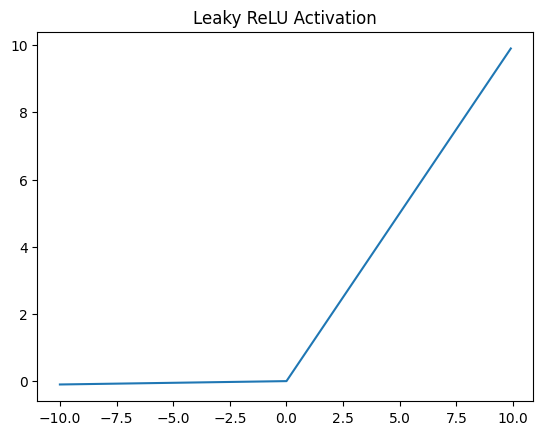

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the leaky relu function
def leaky_relu(x):
    if x > 0:
        return x
    else:
        return 0.01 * x

# Define the derivative of leaky_relu
def leaky_relu_derivative(x):
    return 1 if x > 0 else 0.01

# Inputs and initialization of weights
x1 = 1.0
x2 = 2.0
w1 = np.random.randn()  # Random initialization of w1
w2 = np.random.randn()  # Random initialization of w2

# Compute the weighted sum (z)
z = w1 * x1 + w2 * x2

# Compute the output using the LeakyReLU activation
output = leaky_relu(z)

# Compute the loss (L2 loss: (output - 5)^2)
loss = (output - 5) ** 2

# Compute the gradients of the loss with respect to w1 and w2
grad_output = 2 * (output - 5)
grad_z = grad_output * leaky_relu_derivative(z)
grad_w1 = grad_z * x1
grad_w2 = grad_z * x2

# Update weights using the gradients
learning_rate = 0.01
w1 -= learning_rate * grad_w1
w2 -= learning_rate * grad_w2

# Print final loss and updated weights
print(f'Loss: {loss}, w1: {w1}, w2: {w2}')

# Plotting the leaky relu function
xs = np.arange(-10, 10, 0.1)
ys = [leaky_relu(x) for x in xs]
plt.title('Leaky ReLU Activation')
plt.plot(xs, ys)
plt.show()

### 1a. Backpropagation by hand (10 points)
Optimize the loss using only python like we did in class. Derive the gradients by hand.

In [ ]:
import random

# initialization

x1 = 5 # data
x2 = 6

w1 = 7 # model params
w2 = 8

lr = 0.01

# Ground truth (assuming a fixed target value)
y_true = 100

def leaky_relu(x):
    return x if x > 0 else 0.01 * x

def leaky_relu_derivative(x):
    return 1 if x > 0 else 0.01

for i in range(100):
    # implement here

    # Forward pass
    z = x1 * w1 + x2 * w2
    y_pred = leaky_relu(z)

    # Loss calculation (MSE)
    loss = (y_pred - y_true) ** 2

    # Compute the gradient of the loss w.r.t. y_pred
    dloss_dypred = 2 * (y_pred - y_true)

    # Gradient of leaky ReLU
    dypred_dz = leaky_relu_derivative(z)

    # Gradients w.r.t. weights
    dz_dw1 = x1
    dz_dw2 = x2

    dloss_dw1 = dloss_dypred * dypred_dz * dz_dw1
    dloss_dw2 = dloss_dypred * dypred_dz * dz_dw2

    # Update weights
    w1 = w1 - lr * dloss_dw1
    w2 = w2 - lr * dloss_dw2

    # Print loss and predictions at every 10th iteration
    if i % 10 == 0:
        print(f"Iteration {i}: prediction={y_pred:.4f}, loss={loss:.4f}")

print(leaky_relu(x1 * w1 + x2 * w2))

Iteration 0: prediction=83.0000, loss=289.0000
Iteration 10: prediction=100.0000, loss=0.0000
Iteration 20: prediction=100.0000, loss=0.0000
Iteration 30: prediction=100.0000, loss=0.0000
Iteration 40: prediction=100.0000, loss=0.0000
Iteration 50: prediction=100.0000, loss=0.0000
Iteration 60: prediction=100.0000, loss=0.0000
Iteration 70: prediction=100.0000, loss=0.0000
Iteration 80: prediction=100.0000, loss=0.0000
Iteration 90: prediction=100.0000, loss=0.0000
100.0


### 1b. Reimplement 1a using torch. (5 points)

Do not use `torch.optim`

In [ ]:
x1 = torch.tensor(3., requires_grad=False) # data
x2 = torch.tensor(4., requires_grad=False)

w1 = torch.tensor(5., requires_grad=True) # model params
w2 = torch.tensor(6., requires_grad=True)

lr = 0.01

for i in range(100):
    # implement

    # Zero the gradients from the previous iteration
    w1.grad = None
    w2.grad = None

    # Forward pass: compute the prediction using leaky ReLU
    z = x1 * w1 + x2 * w2
    prediction = F.leaky_relu(z)

    # Compute the loss (MSE with a fixed target, say target = 10)
    target = torch.tensor(10.)  # For example, you want the prediction to be 10
    loss = (prediction - target) ** 2

    # Backward pass: compute gradient of the loss with respect to w1 and w2
    loss.backward()

    # Manually update weights using gradients
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

    # Optional: print loss and predictions at every 10th iteration
    if i % 10 == 0:
        print(f"Iteration {i}: prediction={prediction.item():.4f}, loss={loss.item():.4f}")

prediction = (F.leaky_relu(x1*w1 + x2*w2)).detach().item()

print(f"prediction: ", prediction)
print(f"Final w1: {w1.item()}, w2: {w2.item()}")

Iteration 0: prediction=39.0000, loss=841.0000
Iteration 10: prediction=10.0283, loss=0.0008
Iteration 20: prediction=10.0000, loss=0.0000
Iteration 30: prediction=10.0000, loss=0.0000
Iteration 40: prediction=10.0000, loss=0.0000
Iteration 50: prediction=10.0000, loss=0.0000
Iteration 60: prediction=10.0000, loss=0.0000
Iteration 70: prediction=10.0000, loss=0.0000
Iteration 80: prediction=10.0000, loss=0.0000
Iteration 90: prediction=10.0000, loss=0.0000
prediction:  10.0
Final w1: 1.5199999809265137, w2: 1.3600001335144043


### 1c. Implement a 2 layer neural network. (5 points)

The neural network should be able to take inputs of size [4, 32] (batch size of 4 with 32 features per sample). The first layer should have have an output dimension of 8 and use the leaky relu activation. The second layer should not use an activation function.

Train the model so that it outputs 5. Use an L2 loss as we did in 1a and 1b.

[Pytorch docs on how to use leaky relu]("https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html")

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        # implement
        super(MLP, self).__init__()
        # First layer: input size is 32, output size is 8
        self.fc1 = nn.Linear(32, 8)
        # Second layer: input size is 8, output size is 1 (for outputting a single value)
        self.fc2 = nn.Linear(8, 1)

    def forward(self, x):
        # implement

        # First layer with leaky ReLU activation
        x = F.leaky_relu(self.fc1(x))
        # Second layer (no activation function)
        x = self.fc2(x)
        return x

x = torch.randn((4, 32)).float()

net = MLP()

# Set the learning rate
learning_rate = 0.01

# Target: the network should output 5 (so target = torch.tensor([5.]) for each batch)
target = torch.tensor([5.]).repeat(4, 1)  # Output 5 for all 4 samples in the batch

# Loss function: L2 loss (Mean Squared Error)
loss_fn = nn.MSELoss()

for _ in range(100):
    # implement

    # Zero gradients
    for param in net.parameters():
        param.grad = None

    # Forward pass: get predictions
    prediction = net(x)

    # Compute the loss
    loss = loss_fn(prediction, target)

    # Backward pass: compute gradients
    loss.backward()

    # Manually update weights using the gradients
    with torch.no_grad():
        for param in net.parameters():
            param -= learning_rate * param.grad

    # Print loss every 10 iterations
    if _ % 10 == 0:
        print(f"Iteration {_}: Loss = {loss.item():.4f}")

prediction = net(x)
print(f"{prediction=}")

Iteration 0: Loss = 24.3863
Iteration 10: Loss = 8.4807
Iteration 20: Loss = 4.1726
Iteration 30: Loss = 2.9994
Iteration 40: Loss = 2.6690
Iteration 50: Loss = 0.9613
Iteration 60: Loss = 0.0593
Iteration 70: Loss = 0.0032
Iteration 80: Loss = 0.0002
Iteration 90: Loss = 0.0000
prediction=tensor([[4.9989],
        [5.0001],
        [4.9999],
        [5.0011]], grad_fn=<AddmmBackward0>)


## Problem 2 (30 points)

The objective is predict 0.6. This time, we will use an L1 loss, a sigmoid activation function, and 3 inputs instead. Specifically,


$prediction = sigmoid(w1 * x1 + w2 * x2 + w3 * x3)$

$loss = l1(prediction, 0.6)$

where $sigmoid$ and $l1$ is defined as:

$sigmoid(x) = \frac{1}{1+e^{-x}}$

and $l1(prediction, target) = absolute\_value(prediction - target)$

$\text{absolute_value}(x) = \begin{cases}
x, & \text{if } x > 0 \\
-x, & \text{otherwise}
\end{cases}$


Note that the absolute value function is a piece wise function, similar to leaky_relu.

Iteration 0: prediction=0.0244, loss=0.5756
Iteration 10: prediction=0.0252, loss=0.5748
Iteration 20: prediction=0.0261, loss=0.5739
Iteration 30: prediction=0.0271, loss=0.5729
Iteration 40: prediction=0.0281, loss=0.5719
Iteration 50: prediction=0.0291, loss=0.5709
Iteration 60: prediction=0.0303, loss=0.5697
Iteration 70: prediction=0.0316, loss=0.5684
Iteration 80: prediction=0.0329, loss=0.5671
Iteration 90: prediction=0.0344, loss=0.5656
Final prediction: 0.0360


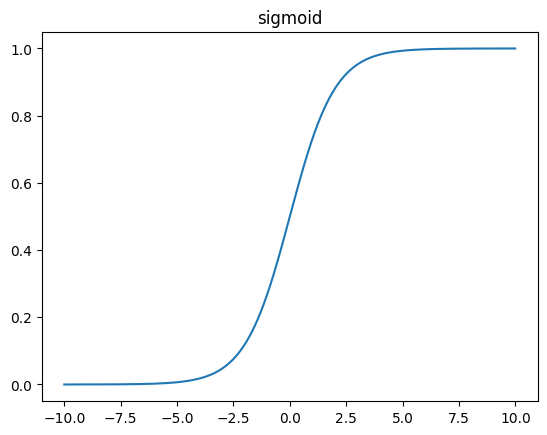

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the L1 loss function
def l1_loss(prediction, target):
    return np.abs(prediction - target)

# Define the derivative of sigmoid (for gradient calculation)
def sigmoid_derivative(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

# Inputs and weights initialization
x1 = 1.0
x2 = 2.0
x3 = 3.0
w1 = np.random.randn()  # Random initialization of w1
w2 = np.random.randn()  # Random initialization of w2
w3 = np.random.randn()  # Random initialization of w3

# Target value
target = 0.6

# Learning rate
learning_rate = 0.01

# Training loop
for i in range(100):
    # Compute the weighted sum (z)
    z = w1 * x1 + w2 * x2 + w3 * x3

    # Compute the prediction using the sigmoid activation
    prediction = sigmoid(z)

    # Compute the L1 loss
    loss = l1_loss(prediction, target)

    # Compute the gradients
    grad_loss = 1 if (prediction - target) > 0 else -1  # Gradient of L1 loss
    grad_pred = grad_loss * sigmoid_derivative(z)  # Chain rule: gradient w.r.t. z
    grad_w1 = grad_pred * x1
    grad_w2 = grad_pred * x2
    grad_w3 = grad_pred * x3

    # Update the weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    w3 -= learning_rate * grad_w3

    # Print the loss and prediction every 10 iterations
    if i % 10 == 0:
        print(f"Iteration {i}: prediction={prediction:.4f}, loss={loss:.4f}")

# Final prediction
final_prediction = sigmoid(w1 * x1 + w2 * x2 + w3 * x3)
print(f"Final prediction: {final_prediction:.4f}")

xs = np.arange(-10, 10, 0.01)

ys = [sigmoid(x) for x in xs]
plt.title('sigmoid')
plt.plot(xs, ys)

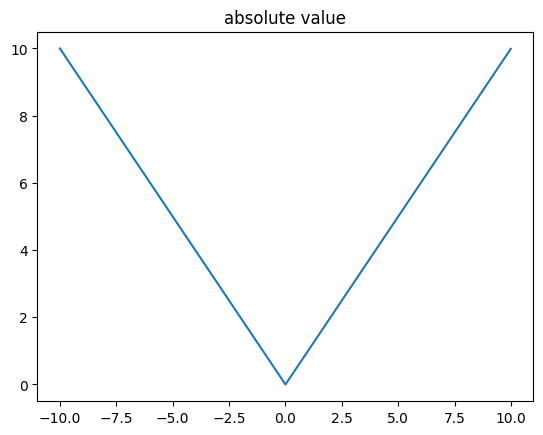

In [ ]:
def absolute_value(x):
    if x < 0:
        return -x
    else:
        return x

xs = np.arange(-10, 10, 0.01)

ys = [absolute_value(x) for x in xs]
plt.title('absolute value')
plt.plot(xs, ys)

### 2a. Backpropagation by hand (15 points)
Optimize the loss using only python like we did in class. Derive the gradients by hand.

In [ ]:
import math
# initialization

x1, x2, x3 = 0.5, 0.6, 0.7 # data
w1, w2, w3 = 0.7, 0.8, 0.9 # model

lr = 0.01

# Target value
target = 0.6

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Sigmoid derivative function
def sigmoid_derivative(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

for i in range(100):
    # implement here

    # Forward pass: compute weighted sum (z) and prediction (sigmoid activation)
    z = x1 * w1 + x2 * w2 + x3 * w3
    prediction = sigmoid(z)

    # Compute the loss (MSE)
    loss = (prediction - target) ** 2

    # Compute the gradient of the loss w.r.t. prediction
    dloss_dpred = 2 * (prediction - target)

    # Gradient of the prediction w.r.t. z (sigmoid derivative)
    dpred_dz = sigmoid_derivative(z)

    # Gradients of z w.r.t. weights
    dz_dw1 = x1
    dz_dw2 = x2
    dz_dw3 = x3

    # Chain rule: gradient of loss w.r.t. each weight
    dloss_dw1 = dloss_dpred * dpred_dz * dz_dw1
    dloss_dw2 = dloss_dpred * dpred_dz * dz_dw2
    dloss_dw3 = dloss_dpred * dpred_dz * dz_dw3

    # Update weights using gradient descent
    w1 = w1 - lr * dloss_dw1
    w2 = w2 - lr * dloss_dw2
    w3 = w3 - lr * dloss_dw3

    # Print loss and prediction at every 10th iteration
    if i % 10 == 0:
        print(f"Iteration {i}: prediction={prediction:.4f}, loss={loss:.4f}")


print(sigmoid(x1 * w1 + x2 * w2 + x3 * w3))

Iteration 0: prediction=0.8115, loss=0.0447
Iteration 10: prediction=0.8104, loss=0.0443
Iteration 20: prediction=0.8093, loss=0.0438
Iteration 30: prediction=0.8082, loss=0.0434
Iteration 40: prediction=0.8071, loss=0.0429
Iteration 50: prediction=0.8060, loss=0.0425
Iteration 60: prediction=0.8049, loss=0.0420
Iteration 70: prediction=0.8038, loss=0.0415
Iteration 80: prediction=0.8027, loss=0.0411
Iteration 90: prediction=0.8016, loss=0.0406
0.800456334145458


### 2b. Reimplement 2a using torch. (5 points)

Do not use `torch.optim`

In [ ]:
# implement here (follow the structure of 1b)

# Sigmoid function using torch
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# Data inputs
x1 = torch.tensor(0.5, requires_grad=False)
x2 = torch.tensor(0.6, requires_grad=False)
x3 = torch.tensor(0.7, requires_grad=False)

# Model parameters (weights)
w1 = torch.tensor(0.7, requires_grad=True)
w2 = torch.tensor(0.8, requires_grad=True)
w3 = torch.tensor(0.9, requires_grad=True)

# Learning rate
learning_rate = 0.01

# Target value (goal for the prediction)
target = torch.tensor(0.6, requires_grad=False)

# Training loop
for i in range(100):
    # Zero the gradients from the previous iteration
    w1.grad = None
    w2.grad = None
    w3.grad = None

    # Forward pass: compute the prediction using the sigmoid function
    z = x1 * w1 + x2 * w2 + x3 * w3
    prediction = sigmoid(z)

    # Compute the loss (L2 loss)
    loss = (prediction - target) ** 2

    # Backward pass: compute gradients of the loss with respect to w1, w2, and w3
    loss.backward()

    # Manually update the weights using the gradients
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w3 -= learning_rate * w3.grad

    # Print loss and prediction every 10 iterations
    if i % 10 == 0:
        print(f"Iteration {i}: prediction={prediction.item():.4f}, loss={loss.item():.4f}")

# Final prediction after training
final_prediction = sigmoid(x1 * w1 + x2 * w2 + x3 * w3).detach().item()

print(f"Final prediction: {final_prediction:.4f}")
print(f"Final w1: {w1.item()}, w2: {w2.item()}, w3: {w3.item()}")

Iteration 0: prediction=0.8115, loss=0.0447
Iteration 10: prediction=0.8104, loss=0.0443
Iteration 20: prediction=0.8093, loss=0.0438
Iteration 30: prediction=0.8082, loss=0.0434
Iteration 40: prediction=0.8071, loss=0.0429
Iteration 50: prediction=0.8060, loss=0.0425
Iteration 60: prediction=0.8049, loss=0.0420
Iteration 70: prediction=0.8038, loss=0.0415
Iteration 80: prediction=0.8027, loss=0.0411
Iteration 90: prediction=0.8016, loss=0.0406
Final prediction: 0.8005
Final w1: 0.6677950024604797, w2: 0.7613539695739746, w3: 0.8549127578735352


### 2c. Implement a 2 layer neural network. (10 points)

The neural network should be able to take inputs of size [4, 32] (batch size of 4 with 32 features per sample). The first layer should have have an output dimension of 8 and use the sigmoid activation. The second layer should also use a sigmoid activation function.

Train the model so that it outputs 0.6. Use an L2 loss as we did in 1a and 1b.

[PyTorch docs for how to use sigmoid](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)

In [ ]:
# implement here (follow the structure of 1c)

# Define the neural network model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # First layer: input size is 32, output size is 8
        self.fc1 = nn.Linear(32, 8)
        # Second layer: input size is 8, output size is 1
        self.fc2 = nn.Linear(8, 1)

    def forward(self, x):
        # First layer with sigmoid activation
        x = torch.sigmoid(self.fc1(x))
        # Second layer with sigmoid activation
        x = torch.sigmoid(self.fc2(x))
        return x

# Initialize the network
net = MLP()

# Create random input tensor of shape [4, 32] (batch of 4, each with 32 features)
x = torch.randn((4, 32)).float()

# Set the learning rate
learning_rate = 0.1

# Target: the network should output 0.6 for each sample
target = torch.tensor([0.6]).repeat(4, 1)  # Output 0.6 for all 4 samples in the batch

# Loss function: L2 loss (Mean Squared Error)
loss_fn = nn.MSELoss()

# Training loop
for epoch in range(100):
    # Zero the gradients from the previous iteration
    for param in net.parameters():
        param.grad = None

    # Forward pass: compute the predictions
    prediction = net(x)

    # Compute the loss
    loss = loss_fn(prediction, target)

    # Backward pass: compute gradients
    loss.backward()

    # Manually update the weights using the computed gradients
    with torch.no_grad():
        for param in net.parameters():
            param -= learning_rate * param.grad

    # Print the loss every 10 epochs
    if epoch % 10 == 0:
        print(f"Iteration {epoch}: Loss = {loss.item():.4f}")

# Final prediction after 100 iterations
prediction = net(x)
print(f"Final prediction: {prediction}")

Iteration 0: Loss = 0.0419
Iteration 10: Loss = 0.0200
Iteration 20: Loss = 0.0093
Iteration 30: Loss = 0.0043
Iteration 40: Loss = 0.0021
Iteration 50: Loss = 0.0011
Iteration 60: Loss = 0.0006
Iteration 70: Loss = 0.0004
Iteration 80: Loss = 0.0003
Iteration 90: Loss = 0.0002
Final prediction: tensor([[0.5900],
        [0.5837],
        [0.5921],
        [0.6175]], grad_fn=<SigmoidBackward0>)
